In [1]:
from src import MACGenerator, UDP_TX, SlidingBook
import src.TX as TX

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import socket
import struct
import time
import json
import cv2

import sys

sys.path.append('..')
import utils.utils as utils








def tx_param(IP, PORT, param:dict):
# send the parameters to the receiver and the time.time() to synchronize the sender and the receiver
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
        s.connect((IP, PORT))
        data = json.dumps(param).encode()

        for i in range(len(data)//1000):
            s.send(data[i*1000:(i+1)*1000])
            time.sleep(.01)
        s.send(data[(i+1)*1000:])
        time.sleep(.1)
        s.send(b'END')
        time.sleep(.1)
        data = time.time()
        data = struct.pack('d', data)
        s.send(data)
        s.close()



def run_experiment(IP, PORT, param:dict):
    # Capture video from the default camera
    cap = cv2.VideoCapture(0) 
    # Define the compression parameters for Progressive JPEG
    compression_params = [cv2.IMWRITE_JPEG_PROGRESSIVE, 1, cv2.IMWRITE_JPEG_QUALITY, param['QUALITY']]
    ## counting the number of frames per second

    start_time = time.time()
    runTime_cnt = time.time()
    frame_counter = 0
    average_tx_size = 0
    while True:
        ret, frame = cap.read()
        # Encode the image to JPEG format in memory
        success, encoded_frame = cv2.imencode('.jpg', frame, compression_params)
        data = encoded_frame.tobytes()
        average_tx_size+=len(data)//1000

        #############################  TX  ########################################
        buffer = SlidingBook(num_pages=40, page_size=len(param['X']))
        page_processor = MACGenerator(X = param['X'], Y = param['Y'], secret_key=param['KEY'].encode(), digestmod=param['DIGESTMOD'])
        udp_tx = UDP_TX(IP= IP, PORT= PORT, buffer=buffer, page_processor= page_processor, Payload_Size_Byte = param['PAYLOAD_SIZE_BYTE'])
        pages = udp_tx.segment_to_pages(data)
        udp_tx.transmit(pages, param['ATTACK_PROBABILITY'])
        ###########################################################################

        cv2.imshow('Webcam', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):  # Press 'q' to quit
            break

        # print the frame rate
        frame_counter += 1
        if time.time() - start_time >= 1:
            print("frame per second: ", frame_counter, "fps ,data rate: ", average_tx_size, "KB/s")
            frame_counter = 0
            start_time = time.time()
            average_tx_size = 0
        if time.time() - runTime_cnt >= param['DURATION']:
            break
    cv2.destroyAllWindows()
    cap.release()
    



#### test the function
###### IP, PORRT ######
IP = "10.42.0.15"
PORT = 23422
#######################

#### parameters that needs to be exhanged between the sender and the receiver #####
param ={}

#traditional MAC
X = np.eye(10)
Y = np.eye(10)

param['X'] = X.tolist()
param['Y'] = Y.tolist()
param['KEY'] = "key"
param['DIGESTMOD'] = 'sha384'
param['PAYLOAD_SIZE_BYTE']= 1024
param['QUALITY'] = 70   # param['QUALITY'] of the JPEG compression
param['ATTACK_PROBABILITY'] = 0.00  # probability of the attack
param['DURATION'] = 10  # running time of the sender in seconds
####################################################################################
tx_param(IP, PORT, param)
run_experiment(IP, PORT, param)

[ WARN:0@0.703] global ./modules/videoio/src/cap_gstreamer.cpp (1405) open OpenCV | GStreamer warning: Cannot query video position: status=0, value=-1, duration=-1


frame per second:  27 fps ,data rate:  1219 KB/s
frame per second:  31 fps ,data rate:  1395 KB/s
frame per second:  30 fps ,data rate:  1350 KB/s
frame per second:  31 fps ,data rate:  1396 KB/s
frame per second:  31 fps ,data rate:  1395 KB/s
frame per second:  30 fps ,data rate:  1350 KB/s
frame per second:  30 fps ,data rate:  1350 KB/s
frame per second:  31 fps ,data rate:  1395 KB/s
frame per second:  31 fps ,data rate:  1422 KB/s


Total runtime for experiments:  270.0 minutes


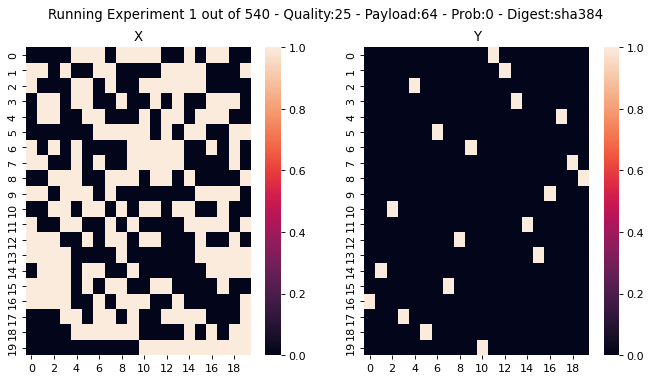

[ WARN:0@11.663] global ./modules/videoio/src/cap_gstreamer.cpp (1405) open OpenCV | GStreamer warning: Cannot query video position: status=0, value=-1, duration=-1


frame per second:  30 fps ,data rate:  627 KB/s
frame per second:  30 fps ,data rate:  630 KB/s
frame per second:  31 fps ,data rate:  651 KB/s
frame per second:  31 fps ,data rate:  651 KB/s
frame per second:  30 fps ,data rate:  630 KB/s
frame per second:  31 fps ,data rate:  651 KB/s
frame per second:  31 fps ,data rate:  651 KB/s
frame per second:  30 fps ,data rate:  630 KB/s
frame per second:  31 fps ,data rate:  651 KB/s
frame per second:  31 fps ,data rate:  651 KB/s
frame per second:  31 fps ,data rate:  643 KB/s
frame per second:  30 fps ,data rate:  611 KB/s
frame per second:  30 fps ,data rate:  587 KB/s
frame per second:  31 fps ,data rate:  629 KB/s
frame per second:  30 fps ,data rate:  594 KB/s
frame per second:  31 fps ,data rate:  621 KB/s
frame per second:  30 fps ,data rate:  630 KB/s
frame per second:  30 fps ,data rate:  629 KB/s
frame per second:  30 fps ,data rate:  630 KB/s
frame per second:  31 fps ,data rate:  651 KB/s
frame per second:  31 fps ,data rate:  6

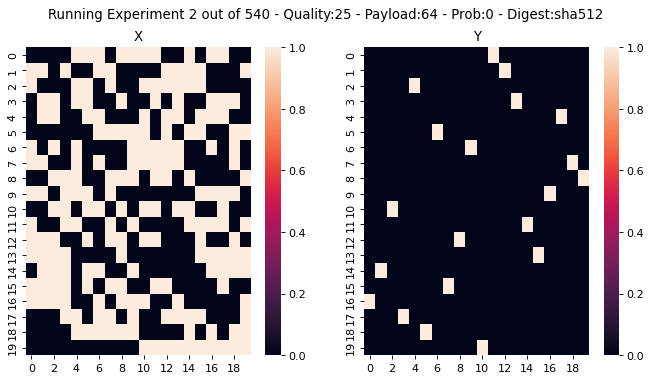

[ WARN:0@43.558] global ./modules/videoio/src/cap_gstreamer.cpp (1405) open OpenCV | GStreamer warning: Cannot query video position: status=0, value=-1, duration=-1


frame per second:  30 fps ,data rate:  530 KB/s
frame per second:  31 fps ,data rate:  574 KB/s
frame per second:  31 fps ,data rate:  574 KB/s
frame per second:  30 fps ,data rate:  570 KB/s
frame per second:  31 fps ,data rate:  589 KB/s
frame per second:  30 fps ,data rate:  570 KB/s
frame per second:  31 fps ,data rate:  589 KB/s
frame per second:  31 fps ,data rate:  589 KB/s
frame per second:  31 fps ,data rate:  588 KB/s
frame per second:  30 fps ,data rate:  564 KB/s
frame per second:  31 fps ,data rate:  563 KB/s
frame per second:  30 fps ,data rate:  540 KB/s
frame per second:  31 fps ,data rate:  559 KB/s
frame per second:  31 fps ,data rate:  560 KB/s
frame per second:  30 fps ,data rate:  547 KB/s
frame per second:  31 fps ,data rate:  570 KB/s
frame per second:  30 fps ,data rate:  559 KB/s
frame per second:  30 fps ,data rate:  558 KB/s
frame per second:  31 fps ,data rate:  578 KB/s
frame per second:  30 fps ,data rate:  561 KB/s
frame per second:  30 fps ,data rate:  5

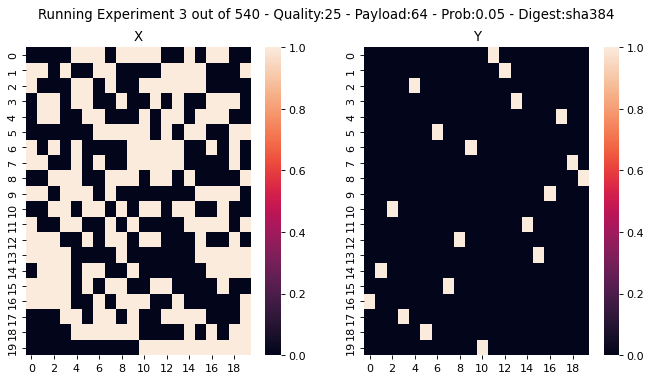

[ WARN:0@75.435] global ./modules/videoio/src/cap_gstreamer.cpp (1405) open OpenCV | GStreamer warning: Cannot query video position: status=0, value=-1, duration=-1


frame per second:  27 fps ,data rate:  486 KB/s
frame per second:  31 fps ,data rate:  584 KB/s
frame per second:  31 fps ,data rate:  575 KB/s
frame per second:  31 fps ,data rate:  545 KB/s
frame per second:  31 fps ,data rate:  545 KB/s
frame per second:  30 fps ,data rate:  497 KB/s
frame per second:  31 fps ,data rate:  549 KB/s
frame per second:  30 fps ,data rate:  522 KB/s
frame per second:  31 fps ,data rate:  524 KB/s
frame per second:  31 fps ,data rate:  541 KB/s
frame per second:  30 fps ,data rate:  511 KB/s
frame per second:  30 fps ,data rate:  517 KB/s
frame per second:  31 fps ,data rate:  536 KB/s
frame per second:  30 fps ,data rate:  587 KB/s
frame per second:  30 fps ,data rate:  620 KB/s
frame per second:  31 fps ,data rate:  651 KB/s
frame per second:  30 fps ,data rate:  627 KB/s


In [2]:
###### IP, PORRT ######
IP = "10.42.0.15"
PORT = 23422
#######################



################# number of experimnets ###############
qualities = [25, 75]
payload_sizes = [64, 128, 1024]
attack_probabilities = [0, 0.05, 0.1, 0.2, 0.3]

# qualities = [60]
# payload_sizes = [32, 128]
# attack_probabilities = [0, 0.001]

digets = ['sha384', 'sha512']
Duration = 30 # Seconds
exp = utils.Load_Experiments("../Examples/Xs.pkl")
#######################################################

total_number_of_experiments = 0
for i in range(len(exp)):
    if not(exp[i]['parameters']['m_nr'] == 20 and exp[i]['parameters']['t_nr'] == 20) :
        continue
    if np.array_equal(np.array(exp[i]['results']['X']),np.ones(np.array(exp[i]['results']['X']).shape)) or exp[i]['parameters']['q'] != 1:
        continue
    total_number_of_experiments += 1

total_number_of_experiments = len(qualities)*len(payload_sizes)*len(attack_probabilities)*len(digets)*total_number_of_experiments
print("Total runtime for experiments: ", total_number_of_experiments*Duration/60, "minutes")

cnt = 0
for i in range(len(exp)):
    if not(exp[i]['parameters']['m_nr'] == 20 and exp[i]['parameters']['t_nr'] == 20):
        continue
    if np.array_equal(np.array(exp[i]['results']['X']),np.ones(np.array(exp[i]['results']['X']).shape)) or exp[i]['parameters']['q'] != 1:
        continue

    X = exp[i]['results']['X']
    Y = utils.Get_Y(X)
    # try:
    #     if Y := utils.Get_Y(X) is None:
    #         continue
    # except:
    #     continue

    for quality in qualities:
        for payload_size in payload_sizes:
            for attack_prob in attack_probabilities:
                for digest in digets:

                    param = {}
                    param['X'] = X.tolist()
                    param['Y'] = Y.tolist()
                    param['KEY'] = "key"
                    param['DIGESTMOD'] = digest
                    param['PAYLOAD_SIZE_BYTE'] = payload_size
                    param['QUALITY'] = quality
                    param['ATTACK_PROBABILITY'] = attack_prob
                    param['DURATION'] = Duration

                    plt.figure(figsize = (10,5), dpi=80)
                    plt.subplot(1, 2, 1)
                    sns.heatmap(param['X'])
                    plt.title('X')
                    plt.subplot(1, 2, 2)
                    try:
                        sns.heatmap(param['Y'])
                        plt.title('Y')
                    except:
                        pass
                    cnt += 1
                    plt.suptitle(f'Running Experiment {cnt} out of {total_number_of_experiments}' + ' - Quality:' + str(quality) + ' - Payload:' + str(payload_size) + ' - Prob:' + str(attack_prob) + ' - Digest:' + digest)
                    plt.show()

                    tx_param(IP, PORT, param)
                    run_experiment(IP, PORT, param)
                    time.sleep(1)


                    

           


